## **Importing library**

In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [52]:
df=pd.read_csv("/content/glass.csv")

In [53]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [55]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [56]:
df.duplicated().sum()

1

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.duplicated().sum()

0

In [59]:
df.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## **Normalizing data**

In [60]:
from sklearn.preprocessing import scale

In [61]:
df1=df.iloc[:,:9]

In [62]:
# Converting into numpy array
df2=df1.values

In [63]:
# Normalizing the  data 
df_norm = scale(df2)

## **Train test split**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x=df_norm
y=df['Type']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# KNN (K Neighrest Neighbour Classifier)

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


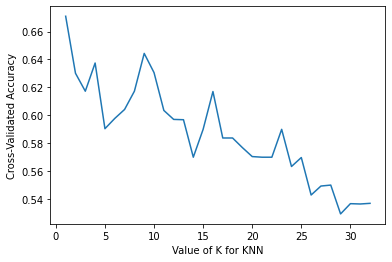

In [68]:
k_range = range(1, 33)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(train_scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [69]:
model = KNeighborsClassifier(n_neighbors=2)

In [70]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [71]:
model.score(x_test, y_test)

0.671875

## **Plot Confusion Matrix**

In [72]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
cm = confusion_matrix(y_test, pred)
cm

array([[16,  2,  0,  0,  0,  0],
       [ 8, 15,  0,  1,  0,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 1,  2,  0,  0,  0,  8]])

In [73]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df.head()

,Actual,Predicted
9,1,1
198,7,7
67,1,1
192,7,7
118,2,2


Text(42.0, 0.5, 'Truth')

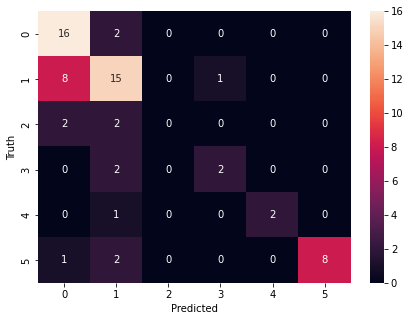

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Grid Search for Algorithm Tuning**

In [75]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [78]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [79]:
print(grid.best_score_)
print(grid.best_params_)

0.6710344827586207
{'n_neighbors': 1}
